In [2]:
import pandas as pd
import seaborn as sns 
import numpy as np
import warnings 

warnings.filterwarnings('ignore')

In [4]:
# Feature Scaling:
 # standardization >> mu = 0 , sigma = 1
 # normalization (minmax scaling) >> data comes between 0 and 1
 # unit vector >> 1

In [7]:
 df = sns.load_dataset('tips')

In [10]:
df

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

<Axes: xlabel='total_bill', ylabel='Density'>

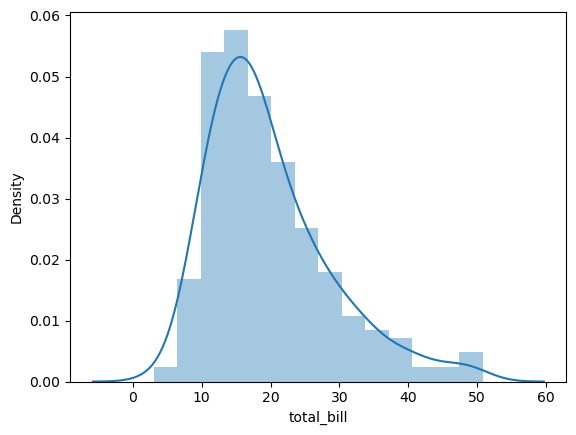

In [16]:
sns.distplot(df['total_bill'])

In [18]:
# Standardization :
mu = np.mean(df['total_bill'])
std = np.std(df['total_bill'])
print(mu , " " , std)

19.78594262295082   8.88415057777113


In [24]:
std_data=[]
for i in list(df['total_bill']):
    zscore = (i-mu)/std
    std_data.append(zscore)

In [26]:
std_data

[-0.31471130509049433,
 -1.0632353132988694,
 0.13777989987156147,
 0.4383151031672548,
 0.5407447042905061,
 0.6195367051545456,
 -1.2399545152367868,
 0.7985071071171497,
 -0.5342033074974615,
 -0.5634689078183904,
 -1.0711145133852735,
 1.7417599174609368,
 -0.49143050702841135,
 -0.1526249033130415,
 -0.5578409077566732,
 0.20193910057513614,
 -1.0643609133112129,
 -0.39350330595453376,
 -0.31696250511518115,
 0.09725829942719796,
 -0.21003050394255576,
 0.05673669898283485,
 -0.4520345065963916,
 2.2100095225958007,
 0.0038334984026941687,
 -0.22241210407833373,
 -0.7221785095588128,
 -0.7987193103981655,
 0.2154463007232573,
 -0.01530170180714419,
 -1.1521577142739996,
 -0.16162970341178867,
 -0.5319521074727744,
 0.10176069947657196,
 -0.22578890411536373,
 0.4810879036363047,
 -0.39125210592984694,
 -0.3214649051645547,
 -0.12335930299211235,
 1.2926455125359118,
 -0.4216433062631193,
 -0.26180810451035325,
 -0.6580193088552377,
 -1.1375249141135353,
 1.1947183114620339,
 -0.16

<Axes: ylabel='Density'>

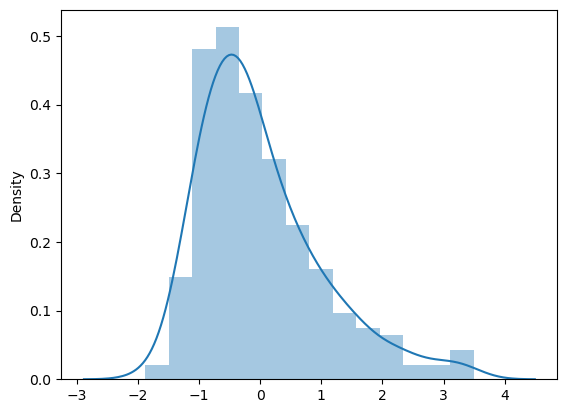

In [28]:
# feature scaling is optional and it dosent change the distribution of the data
sns.distplot(std_data)

In [30]:
# The same distribution is for the standardized data and for the normal data.

In [45]:
# Import StandardScaler class from sklearn's preprocessing module for data standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Initialize a StandardScaler object to transform features by standardizing them to zero mean and unit variance
scaler

StandardScaler()

# Assistant
scaler.fit(df[['total_bill']]) # Fits the scaler by computing mean and standard deviation of 'total_bill' column
                                         # This step is necessary before transforming the data
                                         # The scaler object stores these parameters for later use in scaling

In [48]:
scaler.fit(df[['total_bill']]) # this object has learned mu and sigma from the given data.

StandardScaler()

In [50]:
# Apply the previously fitted scaler to transform 'total_bill' column values
# Returns scaled values while preserving the original data structure
scaler.transform(df[['total_bill']])

array([[-3.14711305e-01],
       [-1.06323531e+00],
       [ 1.37779900e-01],
       [ 4.38315103e-01],
       [ 5.40744704e-01],
       [ 6.19536705e-01],
       [-1.23995452e+00],
       [ 7.98507107e-01],
       [-5.34203307e-01],
       [-5.63468908e-01],
       [-1.07111451e+00],
       [ 1.74175992e+00],
       [-4.91430507e-01],
       [-1.52624903e-01],
       [-5.57840908e-01],
       [ 2.01939101e-01],
       [-1.06436091e+00],
       [-3.93503306e-01],
       [-3.16962505e-01],
       [ 9.72582994e-02],
       [-2.10030504e-01],
       [ 5.67366990e-02],
       [-4.52034507e-01],
       [ 2.21000952e+00],
       [ 3.83349840e-03],
       [-2.22412104e-01],
       [-7.22178510e-01],
       [-7.98719310e-01],
       [ 2.15446301e-01],
       [-1.53017018e-02],
       [-1.15215771e+00],
       [-1.61629703e-01],
       [-5.31952107e-01],
       [ 1.01760699e-01],
       [-2.25788904e-01],
       [ 4.81087904e-01],
       [-3.91252106e-01],
       [-3.21464905e-01],
       [-1.2

In [57]:
# Fit the scaler to the data and transform it in one step
# Scales 'total_bill' and 'tip' columns to have zero mean and unit variance
# Returns scaled version of the selected columns as a numpy array
scaler.fit_transform(df[['total_bill','tip']]) # this will fit and transform simultaneously...

array([[-3.14711305e-01, -1.43994695e+00],
       [-1.06323531e+00, -9.69205340e-01],
       [ 1.37779900e-01,  3.63355539e-01],
       [ 4.38315103e-01,  2.25754144e-01],
       [ 5.40744704e-01,  4.43019505e-01],
       [ 6.19536705e-01,  1.23965916e+00],
       [-1.23995452e+00, -7.22971264e-01],
       [ 7.98507107e-01,  8.81527488e-02],
       [-5.34203307e-01, -7.51939979e-01],
       [-5.63468908e-01,  1.67816714e-01],
       [-1.07111451e+00, -9.32994446e-01],
       [ 1.74175992e+00,  1.44968234e+00],
       [-4.91430507e-01, -1.03438495e+00],
       [-1.52624903e-01,  1.24660453e-03],
       [-5.57840908e-01,  1.57309619e-02],
       [ 2.01939101e-01,  6.67527044e-01],
       [-1.06436091e+00, -9.61963161e-01],
       [-3.93503306e-01,  5.15441291e-01],
       [-3.16962505e-01,  3.63355539e-01],
       [ 9.72582994e-02,  2.54722859e-01],
       [-2.10030504e-01,  7.83401903e-01],
       [ 5.67366990e-02, -1.79807863e-01],
       [-4.52034507e-01, -5.56401155e-01],
       [ 2.

In [63]:
pd.DataFrame(scaler.fit_transform(df[['total_bill','tip']] ), columns = ['total_bill','tip'])

total_bill       tip
0     -0.314711 -1.439947
1     -1.063235 -0.969205
2      0.137780  0.363356
3      0.438315  0.225754
4      0.540745  0.443020
..          ...       ...
239    1.040511  2.115963
240    0.832275 -0.722971
241    0.324630 -0.722971
242   -0.221287 -0.904026
243   -0.113229  0.001247

[244 rows x 2 columns]

In [65]:
# 1. `Fit` is used only on training data to learn parameters (like mean, standard deviation, etc.)
# 2. `Transform` applies those learned parameters to both training and test data 
# This is a crucial distinction because using `fit` on test data would cause data leakage, which could invalidate your model's evaluation.

In [67]:
# Normalization / Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

In [71]:
pd.DataFrame(min_max.fit_transform(df[['total_bill','tip']]) , columns= ['total_bill','tip'])

total_bill       tip
0      0.291579  0.001111
1      0.152283  0.073333
2      0.375786  0.277778
3      0.431713  0.256667
4      0.450775  0.290000
..          ...       ...
239    0.543779  0.546667
240    0.505027  0.111111
241    0.410557  0.111111
242    0.308965  0.083333
243    0.329074  0.222222

[244 rows x 2 columns]

In [85]:
# for unseen or test data we need to use transform like:
min_max.transform([[0,20]])

array([[-0.06430666,  2.11111111]])

In [87]:
# Unit Vector
from sklearn.preprocessing import normalize

In [89]:
uv = normalize(df[['total_bill']])

In [93]:
uv # since 1-dimension all the values are 1.

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],